# Open CV - Imagenes y Video
OpenCV (Open Source Computer Vision Library: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html) es una librería de código abierto que incluye varios cientos de algoritmos de computer vision. OpenCV2 2.x API esta basado en código escrito y compilado en C++.

In [2]:
import cv2

## Lectura de un archivo gráfico

In [3]:
# Open CV utiliza el mapa de colores BGR (no RGB)
img = cv2.imread("sample4.jpg", 0)  # 0 : Gray Scale (cv2.IMREAD_GRAYSCALE)
                                    # >0: Return a 3-color image (cv2.IMREAD_COLOR)
                                    # <0: Return the loaded image with alpha channel (cv2.IMREAD_UNCHANGED)
print(type(img))

<class 'numpy.ndarray'>


In [4]:
print(img)
print("Size:", img.shape)    # Forma del arreglo numpy
print("Dim:", img.ndim)      # Numero de dimensiones

[[255 255 255 ... 176 176 179]
 [255 255 255 ... 176 176 178]
 [255 255 255 ... 176 177 178]
 ...
 [163 163 158 ... 190 189 194]
 [149 148 151 ... 165 166 183]
 [154 153 155 ... 161 162 159]]
Size: (338, 601)
Dim: 2


## Ventana de visualización de una imagen
Para mostrar una imagen es necesario no solo adjuntar la imagen a una ventana con `cv2.imshow`, sino que debe declararse la forma de cerrar esta ventana

In [5]:
cv2.imshow("Sample Img", img)
cv2.waitKey(0)        # ms or 0 for close window
cv2.destroyAllWindows()

Para probar un método sobre el arreglo imagen, podemos llamar a `resize` para ajustar las dimensiones del arreglo (y de la imagen), por medio de un proceso de interpolación.

In [4]:
resized_image = cv2.resize(img, (300, 100))

NameError: name 'img' is not defined

In [7]:
cv2.imshow("Resize Img", resized_image)
cv2.waitKey(0)        # ms or 0 for close window
cv2.destroyAllWindows()

Para ajustar el tamaño de una imagen suele ser común mantener la relación de aspecto (la proporción entre alto y ancho de una imagen). Para esto se puede extraer el tamaño original y operar dirctamente con estos valores

In [9]:
resized_image = cv2.resize(img, (int(img.shape[1]/1.5), int(img.shape[0]/1.5)))
print("Shape:", resized_image.shape)

Shape: (225, 400)


In [10]:
cv2.imshow("Resize Img", resized_image)
cv2.waitKey(0)        # ms or 0 for close window
cv2.destroyAllWindows()

## Guardar una imagen
Podemos guardar una imagen utilizando el método `cv2.imwrite`. Este método retorna un valor booleano para confirmar el proceso

In [11]:
cv2.imwrite("resized_sample1.jpg", resized_image)

True

## OpenCV y matplotlib
Por incompatibilidad con el modelo BGR (OpenCV) y RGB (matplotlib) se suelen visualizar las imagenes en escala de grises, aunque se puede hacer una conversion de un modelo a otro utilizando el método `cv2.cvtColor(img, FILTER)` a RGB.

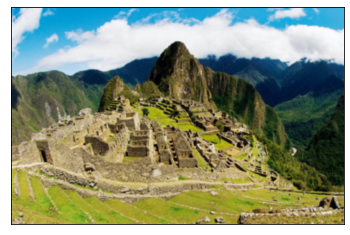

In [5]:
import matplotlib.pyplot as plt
import cv2

#cv_img = cv2.imread("sample1.jpg", cv2.IMREAD_GRAYSCALE)
cv_img = cv2.imread("sample1.jpg")
cv_img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

#plt.imshow(cv_img_rgb, cmap='gray', interpolation='bicubic')
plt.imshow(cv_img_rgb, interpolation='bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

## OpenCV y tkinter
Insertar una imagen en una aplicación gráfica hecha con tkinter requiere ciertas adecuaciones en la imagen leída utilizando cv2:

* Convertir la imagen de BGR a RGB (colores o escala de grises) con los filtros de `cv2.cvtColor`
* Crear un objeto PIL.Photoimage del arreglo numpy de la imagen
* Convertir el objeto PIL.Photoimage en un objeto PIL.ImageTk.PhotoImage para poder insertarlo en un widget
* Insertar la imagen en un Canvas o en un Label y mantener la referencia con `widget.image` = imagen insertada

Este ultimo paso es un detalle técnico que evita que la imagen sea trasparente (y no se vea) por un problema de referencias entre archivos y los objetos Tk (garbage collector)

In [ ]:
from tkinter import Tk, Canvas
from PIL import Image, ImageTk
import cv2

class App:
    def __init__(self, master):
        width, height = 600, 400
        master.title("Image Viewer")
        master.resizable(0, 0)
        
        self.canvas = Canvas(master, width=width, height=height, borderwidth=1, relief='sunken')
        self.canvas.pack()
    
        cv_img = cv2.imread("sample1.jpg")
        cv_img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
        cv_img_re = cv2.resize(cv_img_rgb, (width, height))
        
        try:
            photo = ImageTk.PhotoImage(image=Image.fromarray(cv_img_re))
            self.canvas.create_image(0, 0, image=photo, anchor='nw')
            self.canvas.image = photo    # REFERENCIA - (garbage collector)
        except:
            pass

        
root = Tk()
app = App(root)
root.mainloop()

## Ejercicio
Crear una aplicación que abra una ventana de dialogo que permita seleccionar un archivo gráfico del sistema para mostrarlo en el visor gráfico.

In [ ]:
from tkinter import Tk, Frame, Canvas, Button
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
import cv2

class App:
    def __init__(self, master):
        pass
        
root = Tk()
app = App(root)
root.mainloop()

## Captura de una camara

In [ ]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('WebCam Color', frame)
    cv2.imshow('WebCam Gray', gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## Guardar un video capturado

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
codec = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('cam_out.avi', codec, 20.0, (640, 480))

while True:
    ret, frame = cap.read()
    out.write(frame)
    
    cv2.imshow('WebCam Color', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

## Insertar un video en tkinter

In [1]:
from tkinter import Tk, Frame, Canvas, Button
from PIL import Image, ImageTk
import cv2
import threading

class App:
    def __init__(self, master):
        self.master = master
        self.master.title("Video Feed")
        self.master.resizable(0, 0)
        
        self.cap = cv2.VideoCapture(0)
        self.width, self.height = int(self.cap.get(3)), int(self.cap.get(4))
        
        frm1 = Frame(self.master)
        frm1.pack()
        
        self.canvas = Canvas(frm1, width=self.width, height=self.height, borderwidth=1, relief='sunken')
        self.canvas.pack()
        
        ret, frame = self.cap.read()
        photo = ImageTk.PhotoImage(image=Image.fromarray(frame))
        self.canvas.create_image(0, 0, image=photo, anchor='nw')
        self.canvas.image = photo
                
        th = threading.Thread(target=self.cam_loop, daemon=True)
        th.start()
        
        # Manejo del boton "X" de la ventana en Windows
        self.master.protocol("WM_DELETE_WINDOW", self.closing)
        
    def cam_loop(self):
        self.update()
        
    def update(self):
        ret, frame = self.cap.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            try:
                photo = ImageTk.PhotoImage(image=Image.fromarray(frame))
                self.canvas.create_image(0, 0, image=photo, anchor='nw')
                self.canvas.image = photo
            except:
                pass
            
        self.master.after(20, self.cam_loop)    
        
    def closing(self):
        if self.cap.isOpened():
            self.cap.release()
        self.master.destroy()
        
        
root = Tk()
app = App(root)
root.mainloop()

## Ejercicio
Hacer una aplicación de un Kiosko de fotos en tkinter. Agregar un boton a la aplicación que permita tomar fotos de una captura de videos y guarde las fotos con el nombre "pic-HH-MM-SS.jpg"), donde HH y MM es la información de Hora, Minuto y Segundo que la foto fue capturada.

In [ ]:
from tkinter import Tk, Canvas, Frame, Button
from PIL import Image, ImageTk
import threading
import cv2
import time

class App:
    def __init__(self, master):
        pass
        
root = Tk()
app = App(root)
root.mainloop()